In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car driving risk analysis.csv')
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


# Showing Plot

Text(0.5, 1.0, 'car driving risk data')

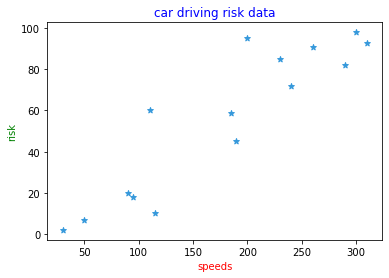

In [3]:
plt.scatter(df['speed'] , df['risk'], color='#3498DB',marker='*')
plt.xlabel('speeds',color='red')
plt.ylabel('risk', color='green')
plt.title('car driving risk data', color='blue')

Text(0.5, 1.0, 'Car driving risk data')

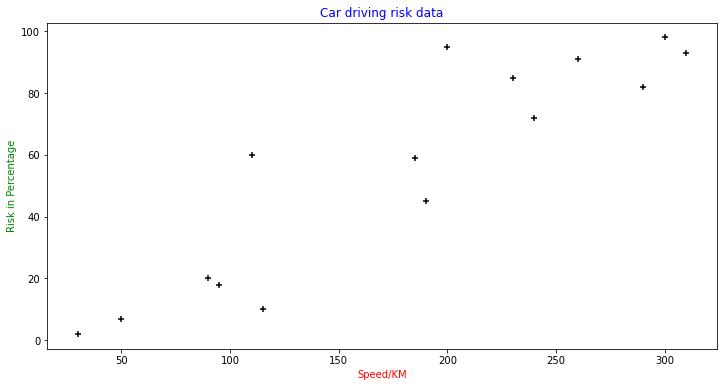

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(df['speed'] , df['risk'], color='black',marker='+')
plt.xlabel('Speed/KM',color='red')
plt.ylabel('Risk in Percentage', color='green')
plt.title('Car driving risk data', color='blue')

In [5]:
df.risk.mean()

55.8

In [6]:
df.speed.mean()

179.66666666666666

In [7]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


In [8]:
import seaborn as sns

<AxesSubplot:xlabel='speed', ylabel='Count'>

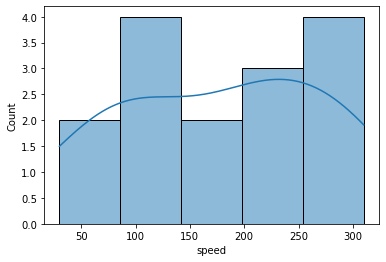

In [9]:
sns.histplot(df['speed'], kde=True)

<AxesSubplot:xlabel='risk', ylabel='Count'>

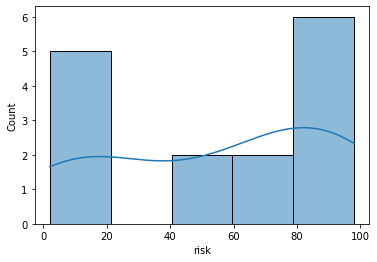

In [10]:
sns.histplot(df['risk'], kde=True)

In [11]:
x = df[['speed']]
y = df['risk']

In [12]:
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [13]:
y.head()

0    95
1    20
2    98
3    60
4    72
Name: risk, dtype: int64

In [14]:
df.shape

(15, 2)

# Train Test Data Seperation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.30) # training data = 70%

In [17]:
xtrain.head()

,speed
8,190
2,300
13,95
7,230
14,30


# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [20]:
m = reg.coef_

In [21]:
c = reg.intercept_

In [22]:
x1 = 170
y = (m*x1)+c
print('Risk is ',y)

Risk is  [50.70262989]


In [23]:
reg.predict([[170]])

C:\Users\Study Mart\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.70262989])

In [24]:
df['predicted_risk'] = reg.predict(x)

In [25]:
df.head()

,speed,risk,predicted_risk
0,200,95,62.394740
1,90,20,19.523669
2,300,98,101.368441
3,110,60,27.318409
4,240,72,77.984221


# Best fit line

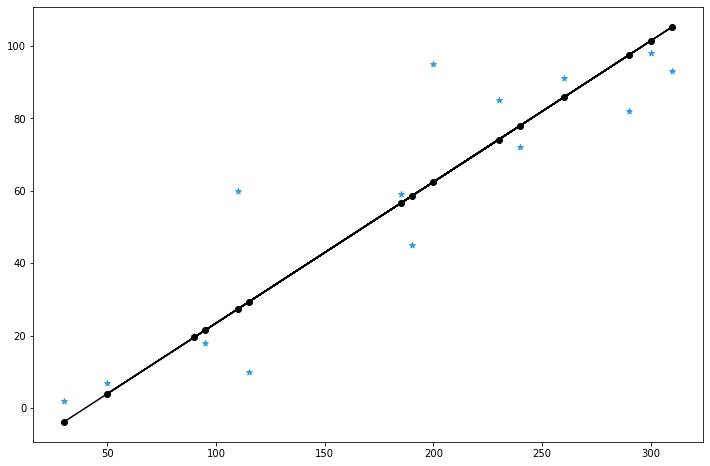

In [26]:
plt.figure(figsize=(12,8)) #
plt.scatter(df['speed'] , df['risk'], color='#3498DB',marker='*')
plt.plot(x, reg.predict(x), marker = 'o',color='black')